In [1]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
start_date = '2023-12-1'
end_date = '2024-12-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-1  End Date: 2024-12-1


In [3]:
ticker = 'TSLA'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300
...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-01 to 2024-11-29
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, TSLA)  251 non-null    float64
 1   (Close, TSLA)      251 non-null    float64
 2   (High, TSLA)       251 non-null    float64
 3   (Low, TSLA)        251 non-null    float64
 4   (Open, TSLA)       251 non-null    float64
 5   (Volume, TSLA)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [5]:
df.isnull().sum()

Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

In [6]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

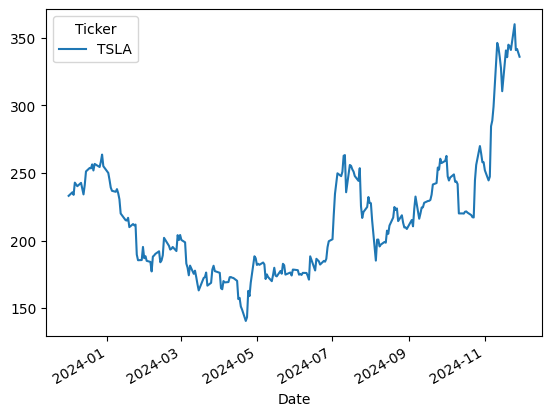

In [7]:
df['Open'].plot()

<Axes: xlabel='Date'>

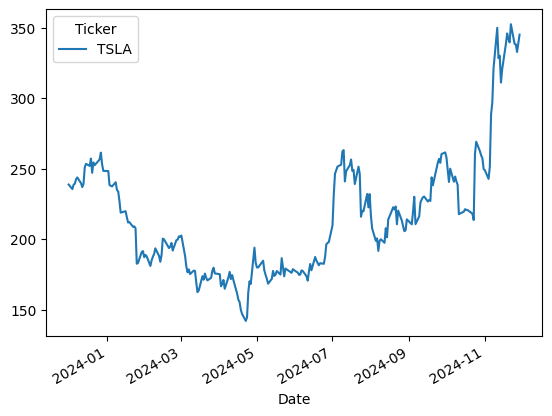

In [8]:
df['Close'].plot()

In [9]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000
2023-12-08,243.839996,243.839996,245.270004,239.270004,240.270004,102980100,239.829999
2023-12-11,239.740005,239.740005,243.440002,237.449997,242.740005,97913900,239.817143
2023-12-12,237.009995,237.009995,238.990005,233.869995,238.550003,95328300,239.466249


<Axes: xlabel='Date'>

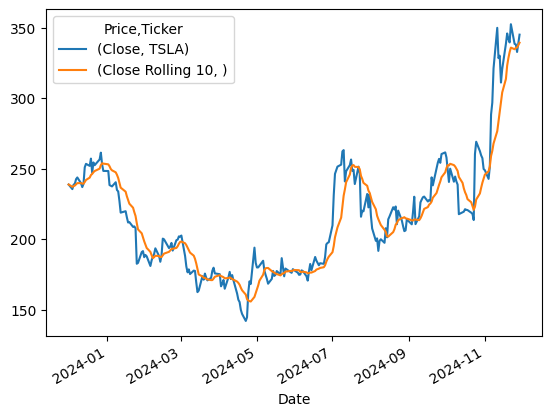

In [10]:
df[['Close','Close Rolling 10']].plot()

In [11]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [12]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000


<Axes: xlabel='Date'>

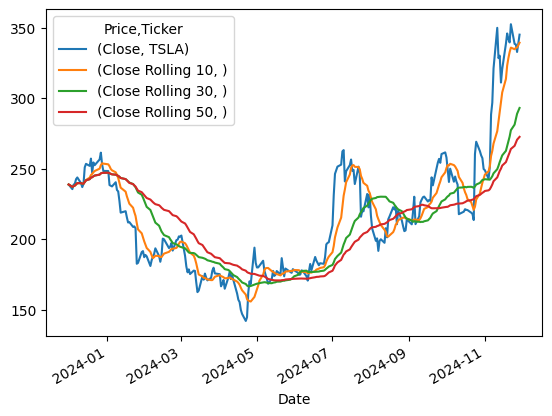

In [13]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [14]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,
Date,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000
...,...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597


<Axes: xlabel='Date'>

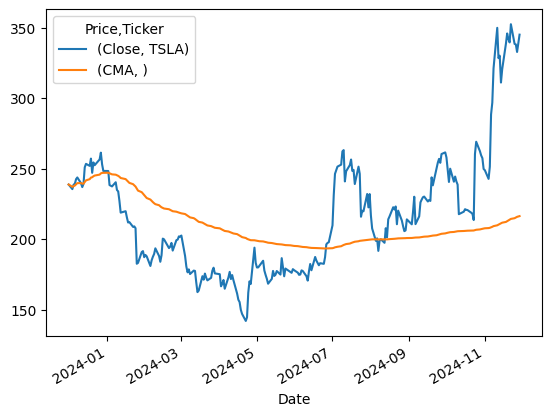

In [15]:
df[['Close','CMA']].plot()

In [1]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adf_test(df['Close'])

ADF Statistics: -0.21546653898451537
p- value: 0.9366527608531471
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [18]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,
Date,,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004


In [19]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -15.615983299237971
p- value: 1.7558357345756553e-28
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

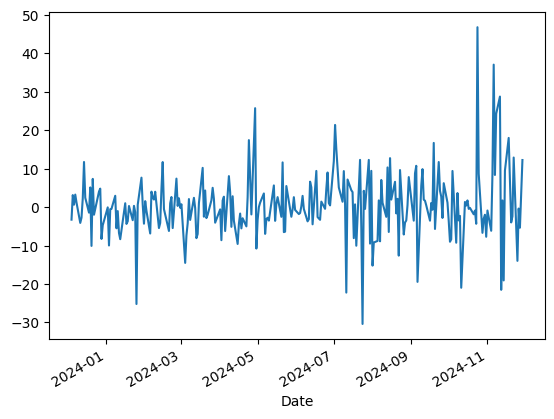

In [20]:
df['First Difference'].dropna().plot()

In [59]:
df['Second Difference'] = df['First Difference']-df['First Difference'].shift(1)
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference,Predicted_ARIMA,Second Difference
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,
Date,,,,,,,,,,,,,
2023-12-01,238.830002,238.830002,240.190002,231.899994,233.139999,121173500,238.830002,238.830002,238.830002,238.830002,NaN,NaN,NaN
2023-12-04,235.580002,235.580002,239.369995,233.289993,235.750000,104099800,237.205002,237.205002,237.205002,237.205002,-3.250000,NaN,NaN
2023-12-05,238.720001,238.720001,246.660004,233.699997,233.869995,137971100,237.710002,237.710002,237.710002,237.710002,3.139999,NaN,6.389999
2023-12-06,239.369995,239.369995,246.570007,239.169998,242.919998,126436200,238.125000,238.125000,238.125000,238.125000,0.649994,NaN,-2.490005
2023-12-07,242.639999,242.639999,244.080002,236.979996,241.550003,107142300,239.028000,239.028000,239.028000,239.028000,3.270004,NaN,2.620010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-22,352.559998,352.559998,361.529999,337.700012,341.089996,89140700,335.959998,277.358000,264.061800,214.444008,12.919983,339.512602,15.309967
2024-11-25,338.589996,338.589996,361.929993,338.200012,360.140015,95890900,334.818997,281.338999,266.298000,214.944597,-13.970001,352.366607,-26.889984


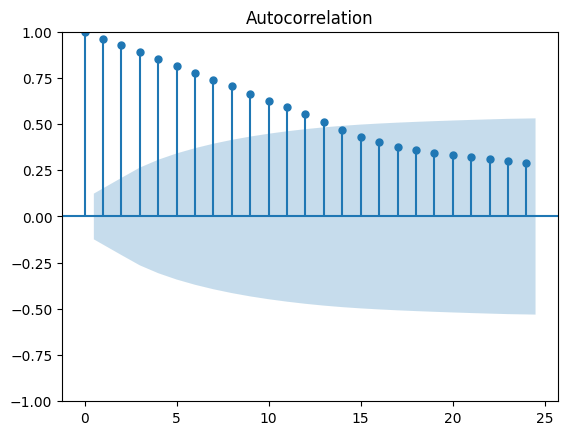

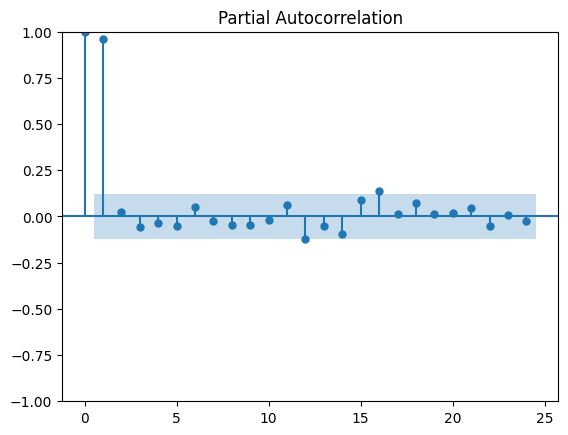

In [62]:
acf = plot_acf(df["Close"].dropna())
pacf = plot_pacf(df["Close"].dropna())

In [22]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Prog

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=6.17 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1791.632, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1793.629, Time=0.04 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1793.630, Time=0.44 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1790.237, Time=0.02 sec


c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1795.601, Time=0.86 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 7.563 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:                        SARIMAX   Log Likelihood                -894.118
Date:                Tue, 17 Dec 2024   AIC                           1790.237
Time:                        10:36:59   BIC                           1793.758
Sample:                             0   HQIC                          1791.654
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        74.8189      3.503     21.358      0.000      67.953      81.685
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               305.60
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                             0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
model_ARIMA=ARIMA(df['Close'],order=())
model_ARIMA_fit = model_ARIMA.fit()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: Con

In [82]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   TSLA   No. Observations:                  251
Model:                ARIMA(1, 0, 14)   Log Likelihood                -891.572
Date:                Tue, 17 Dec 2024   AIC                           1817.144
Time:                        11:42:47   BIC                           1877.077
Sample:                             0   HQIC                          1841.262
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        218.9581     22.377      9.785      0.000     175.101     262.816
ar.L1          0.9410      0.028     33.801      0.000       0.886       0.996
ma.L1          0.0433      0.074      0.587      0.557      -0.101       0.188
ma.L2          0.0847      0.075      1.127      0.260      -0.063       0.232
ma.L3          0.0739      0.068      1.079      0.280      -0.060       0.208
ma.L4          0.0096      0.074      0.130      0.897      -0.136       0.155
ma.L5         -0.0327      0.082     -0.400      0.689      -0.193       0.127
ma.L6          0.0595      0.071      0.834      0.404      -0.080       0.199
ma.L7          0.1137      0.066      1.714      0.086      -0.016       0.244
ma.L8          0.1712      0.074      2.304      0.021       0.026       0.317
ma.L9          0.1797      0.050      3.596      0.000       0.082       0.278
ma.L10        -0.0171      0.067     -0.253      0.800      -0.149       0.115
ma.L11         0.2093      0.068      3.088      0.002       0.076       0.342
ma.L12         0.1237      0.061      2.028      0.043       0.004       0.243
ma.L13         0.0971      0.070      1.382      0.167      -0.041       0.235
ma.L14         0.0206      0.089      0.231      0.817      -0.154       0.195
sigma2        70.0634      3.987     17.575      0.000      62.250      77.877
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               327.81
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               3.32   Skew:                             0.89
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
df1 = yf.download(ticker,start='2024-11-28',end=date.today())
df1

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2024-11-29,345.160004,345.160004,345.450012,334.649994,336.079987,37167600
2024-12-02,357.089996,357.089996,360.000000,351.149994,352.380005,77986500
2024-12-03,351.420013,351.420013,355.690002,348.200012,351.799988,58267200
2024-12-04,357.929993,357.929993,358.100006,348.600006,353.000000,50810900
2024-12-05,369.489990,369.489990,375.429993,359.500000,359.869995,81403600
2024-12-06,389.220001,389.220001,389.489990,370.799988,377.420013,81455800
2024-12-09,389.790009,389.790009,404.799988,378.010010,397.609985,96359200
2024-12-10,400.989990,400.989990,409.730011,390.850006,392.679993,97563600


In [83]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2024,11,12),end=datetime(2024,11,29))
residuals=df['Close']-pred_arima

<Axes: xlabel='Date'>

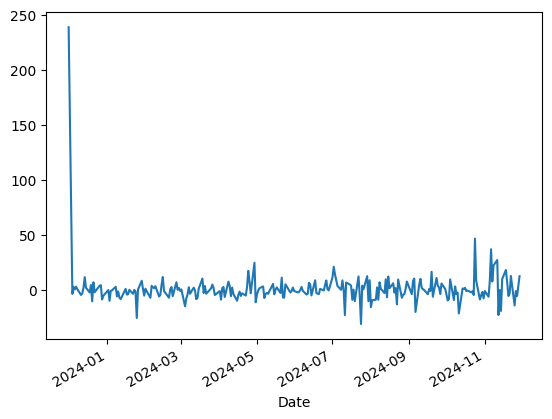

In [54]:
model_ARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

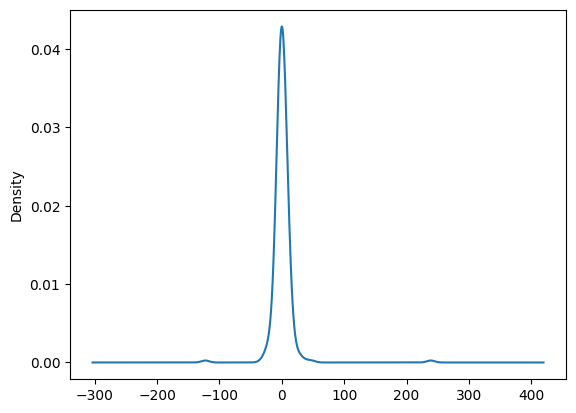

In [47]:
model_ARIMA_fit.resid.plot(kind='kde')

In [84]:
df['Predicted_ARIMA']=pred_arima

<Axes: xlabel='Date'>

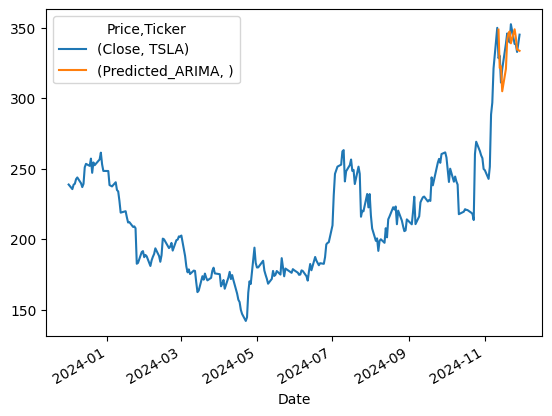

In [85]:
df[['Close','Predicted_ARIMA']].plot()

c:\Users\Prerana Walvekar\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


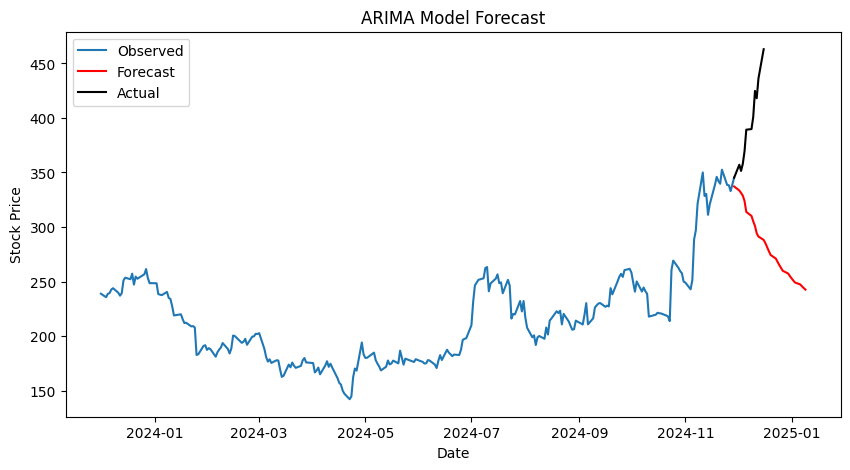

In [87]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [124]:
forecat_res = pd.DataFrame({'Date':df1['Date'],})

251    345.953560
252    347.833710
253    353.170335
254    358.577242
255    359.003927
256    353.445275
257    352.981548
258    355.056135
259    361.864784
260    364.427068
Name: predicted_mean, dtype: float64

df1['Close'].head(10)